In [46]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [47]:
np.random.seed(100)
dataset = np.random.randn(500, 11)
X = dataset[:,0:10].astype("float32")
Y = dataset[:,10].astype("float32")

### Select architecture

In [48]:
# solution 1 -- split single neurons

n_tot = int( X.shape[1] )
splits = int( 2 )
n_splits = int( n_tot/splits )

input = keras.layers.Input(shape = (n_tot), name = "input_layer")
layer1 = keras.layers.Lambda(lambda x: x[:,0:n_splits])(input)  # take the first n_splits neurons
layer2 = keras.layers.Lambda(lambda x: x[:,n_splits:])(input)   # take the other neurons
output1 = keras.layers.Dense(units = 1)(layer1)                 # add extra dense layer
output2 = keras.layers.Dense(units = 1)(layer2)                 # add extra dense layer
output = keras.layers.concatenate([output1, output2])           # concatenate the layers to have a single output layer

model = keras.models.Model(input, output)

In [49]:
print( model.summary() )

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 10)]         0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 5)            0           input_layer[0][0]                
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 5)            0           input_layer[0][0]                
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 1)            6           lambda_4[0][0]                   
____________________________________________________________________________________________

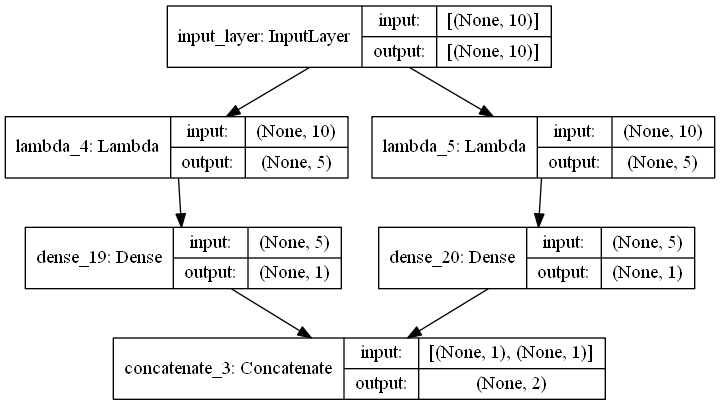

In [50]:
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [56]:
# fit and forecast 
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['MeanSquaredError'])
history = model.fit(X, Y, epochs=100)
forecast = model.predict(X)

Epoch 1/100
16/16 [==============================] - 0s 999us/step - loss: 0.9737 - mean_squared_error: 0.9737
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9732 - mean_squared_error: 0.9732
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9731 - mean_squared_error: 0.9731
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9733 - mean_squared_error: 0.9733
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9731 - mean_squared_error: 0.9731
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9732 - mean_squared_error: 0.9732
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9731 - mean_squared_error: 0.9731
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9731 - mean_squared_error: 0.9731
Epoch 9/100
16/16 [==============================] - 0s 933us/step - loss: 0.9733 - mean_squared_error: 0.9733
Epoch 10/100
16

16/16 [==============================] - 0s 733us/step - loss: 0.9730 - mean_squared_error: 0.9730
Epoch 75/100
16/16 [==============================] - 0s 934us/step - loss: 0.9730 - mean_squared_error: 0.9730
Epoch 76/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9731 - mean_squared_error: 0.9731
Epoch 77/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9731 - mean_squared_error: 0.9731
Epoch 78/100
16/16 [==============================] - 0s 866us/step - loss: 0.9731 - mean_squared_error: 0.9731
Epoch 79/100
16/16 [==============================] - 0s 867us/step - loss: 0.9731 - mean_squared_error: 0.9731
Epoch 80/100
16/16 [==============================] - 0s 934us/step - loss: 0.9732 - mean_squared_error: 0.9732
Epoch 81/100
16/16 [==============================] - 0s 933us/step - loss: 0.9734 - mean_squared_error: 0.9734
Epoch 82/100
16/16 [==============================] - 0s 933us/step - loss: 0.9730 - mean_squared_error: 0.9730
Epoch 83/

In [57]:
# solution 2 -- split entire dataset

input = keras.layers.Input(shape=(n_tot), name = "input_layer")
split = keras.layers.Lambda(lambda x: tf.split(x,num_or_size_splits = splits,axis = 1))(input)
layer1 = keras.layers.Dense(units = 1)(split[0])
layer2 = keras.layers.Dense(units = 1)(split[1])
output = keras.layers.concatenate([layer1, layer2])

model = keras.models.Model(input, output)

In [58]:
print( model.summary() )

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 10)]         0                                            
__________________________________________________________________________________________________
lambda_6 (Lambda)               [(None, 5), (None, 5 0           input_layer[0][0]                
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 1)            6           lambda_6[0][0]                   
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 1)            6           lambda_6[0][1]                   
____________________________________________________________________________________________

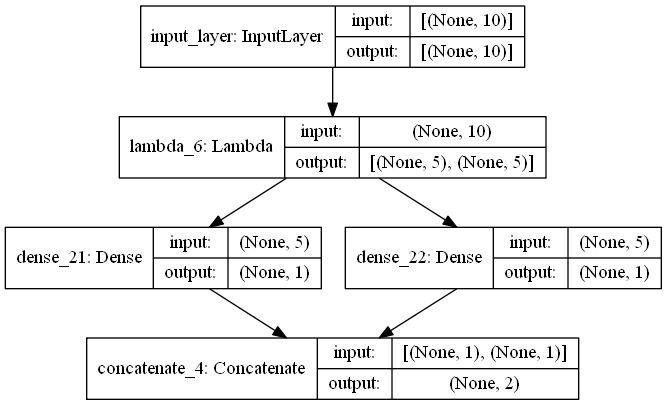

In [59]:
plot_model(model, to_file='model_2.png', show_shapes=True, show_layer_names=True)

In [60]:
# fit and forecast 
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['MeanSquaredError'])
history = model.fit(X, Y, epochs=100)
forecast = model.predict(X)

Epoch 1/100
16/16 [==============================] - 0s 935us/step - loss: 2.3361 - mean_squared_error: 2.3361
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 2.2812 - mean_squared_error: 2.2812
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 2.2312 - mean_squared_error: 2.2312
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 2.1803 - mean_squared_error: 2.1803
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 2.1321 - mean_squared_error: 2.1321
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 2.0869 - mean_squared_error: 2.0869
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 2.0423 - mean_squared_error: 2.0423
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 1.9992 - mean_squared_error: 1.9992
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 1.9589 - mean_squared_error: 1.9589
Epoch 10/100
16/1

16/16 [==============================] - 0s 1ms/step - loss: 1.0089 - mean_squared_error: 1.0089
Epoch 75/100
16/16 [==============================] - 0s 934us/step - loss: 1.0065 - mean_squared_error: 1.0065
Epoch 76/100
16/16 [==============================] - 0s 933us/step - loss: 1.0044 - mean_squared_error: 1.0044
Epoch 77/100
16/16 [==============================] - 0s 1ms/step - loss: 1.0024 - mean_squared_error: 1.0024
Epoch 78/100
16/16 [==============================] - 0s 933us/step - loss: 1.0004 - mean_squared_error: 1.0004
Epoch 79/100
16/16 [==============================] - 0s 933us/step - loss: 0.9989 - mean_squared_error: 0.9989
Epoch 80/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9971 - mean_squared_error: 0.9971
Epoch 81/100
16/16 [==============================] - 0s 866us/step - loss: 0.9956 - mean_squared_error: 0.9956
Epoch 82/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9940 - mean_squared_error: 0.9940
Epoch 83/100


In [61]:
# solution 3 -- separate inputs 
input_1 = keras.layers.Input(shape=(n_splits,))
input_2 = keras.layers.Input(shape=(n_splits,))
layer_1 = keras.layers.Dense(units = 1)(input_1)
layer_2 = keras.layers.Dense(units = 1)(input_2)
output = keras.layers.Add()([layer_1, layer_2])

model = keras.models.Model(inputs=[input_1,input_2], outputs=output)

In [62]:
print( model.summary() )

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 1)            6           input_5[0][0]                    
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 1)            6           input_6[0][0]                    
____________________________________________________________________________________________

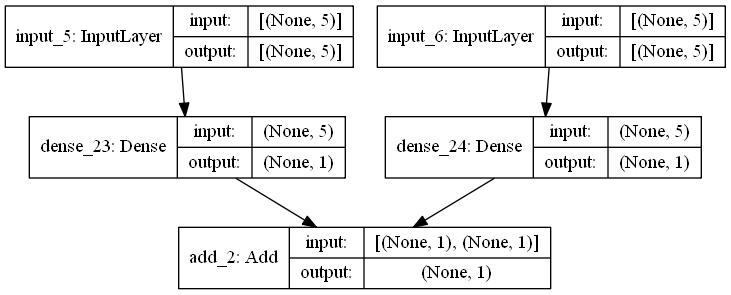

In [63]:
plot_model(model, to_file='model_2.png', show_shapes=True, show_layer_names=True)

In [73]:
# fit and forecast 
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['MeanSquaredError'])
XX = (X[:, :n_splits], X[:, n_splits:])
history = model.fit(XX, Y, epochs=100)
forecast = model.predict(XX)

Epoch 1/100
16/16 [==============================] - 0s 933us/step - loss: 0.9687 - mean_squared_error: 0.9687
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9681 - mean_squared_error: 0.9681
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9677 - mean_squared_error: 0.9677
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9676 - mean_squared_error: 0.9676
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9680 - mean_squared_error: 0.9680
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9680 - mean_squared_error: 0.9680
Epoch 7/100
16/16 [==============================] - 0s 800us/step - loss: 0.9675 - mean_squared_error: 0.9675
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9675 - mean_squared_error: 0.9675
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9676 - mean_squared_error: 0.9676
Epoch 10/100
16

16/16 [==============================] - 0s 933us/step - loss: 0.9678 - mean_squared_error: 0.9678
Epoch 75/100
16/16 [==============================] - 0s 1000us/step - loss: 0.9675 - mean_squared_error: 0.9675
Epoch 76/100
16/16 [==============================] - 0s 1ms/step - loss: 0.9673 - mean_squared_error: 0.9673
Epoch 77/100
16/16 [==============================] - 0s 933us/step - loss: 0.9676 - mean_squared_error: 0.9676
Epoch 78/100
16/16 [==============================] - 0s 866us/step - loss: 0.9676 - mean_squared_error: 0.9676
Epoch 79/100
16/16 [==============================] - 0s 867us/step - loss: 0.9677 - mean_squared_error: 0.9677
Epoch 80/100
16/16 [==============================] - 0s 867us/step - loss: 0.9680 - mean_squared_error: 0.9680
Epoch 81/100
16/16 [==============================] - 0s 933us/step - loss: 0.9673 - mean_squared_error: 0.9673
Epoch 82/100
16/16 [==============================] - 0s 800us/step - loss: 0.9674 - mean_squared_error: 0.9674
Epoch 

In [68]:
n_splits

5

### Predict model

In [22]:
model.compile()
history = model.fit(X, Y, epochs = 100, batch_size = 10)

Epoch 1/100


ValueError: in user code:

    C:\Users\uga05338\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\uga05338\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\uga05338\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\uga05338\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\uga05338\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\uga05338\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\uga05338\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\uga05338\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\uga05338\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:200 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer model_2 expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(10, 9) dtype=float32>]


In [ ]:
print( model.summary())

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, input_dim=10, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X.reshape(())

In [38]:
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
50/50 [==============================] - 0s 959us/step - loss: 0.5929 - accuracy: 0.0000e+00
Epoch 2/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.0000e+00
Epoch 3/150
50/50 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.0000e+00
Epoch 4/150
50/50 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.0000e+00
Epoch 5/150
50/50 [==============================] - 0s 1ms/step - loss: -0.0332 - accuracy: 0.0000e+00
Epoch 6/150
50/50 [==============================] - 0s 1000us/step - loss: -0.1441 - accuracy: 0.0000e+00
Epoch 7/150
50/50 [==============================] - 0s 1ms/step - loss: -0.2418 - accuracy: 0.0000e+00
Epoch 8/150
50/50 [==============================] - 0s 939us/step - loss: -0.3359 - accuracy: 0.0000e+00
Epoch 9/150
50/50 [==============================] - 0s 1ms/step - loss: -0.4292 - accuracy: 0.0000e+00
Epoch 10/150
50/50 [==============================] - 0s 939u

50/50 [==============================] - 0s 857us/step - loss: -132.2816 - accuracy: 0.0000e+00
Epoch 78/150
50/50 [==============================] - 0s 796us/step - loss: -137.1634 - accuracy: 0.0000e+00
Epoch 79/150
50/50 [==============================] - 0s 796us/step - loss: -142.6280 - accuracy: 0.0000e+00
Epoch 80/150
50/50 [==============================] - 0s 938us/step - loss: -147.8891 - accuracy: 0.0000e+00
Epoch 81/150
50/50 [==============================] - 0s 837us/step - loss: -153.0362 - accuracy: 0.0000e+00
Epoch 82/150
50/50 [==============================] - 0s 878us/step - loss: -159.2314 - accuracy: 0.0000e+00
Epoch 83/150
50/50 [==============================] - 0s 857us/step - loss: -164.6409 - accuracy: 0.0000e+00
Epoch 84/150
50/50 [==============================] - 0s 837us/step - loss: -170.4224 - accuracy: 0.0000e+00
Epoch 85/150
50/50 [==============================] - 0s 837us/step - loss: -176.3900 - accuracy: 0.0000e+00
Epoch 86/150
50/50 [============

In [34]:
X.shape

(500, 10)